In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt

import warnings
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\Video-Game-Analysis\Dataset\vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
df.shape

(16598, 11)

In [6]:
df['Genre'].shape

(16598,)

In [7]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [8]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [9]:
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [10]:
# Convert the year column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

sales_by_year = df.groupby(df['Year'].dt.year)['Global_Sales'].sum()

start_year = 1991
end_year = 1995

sales_between_years = sales_by_year.loc[start_year:end_year].sum()

print(f"Total global sales between {start_year} and {end_year}: {sales_between_years}")

Total global sales between 1991 and 1995: 321.65000000000003


In [11]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

sales_by_year = df.groupby(df['Year'].dt.year)['Global_Sales'].sum()

start_year = 2016
end_year = 2020

sales_between_years = sales_by_year.loc[start_year:end_year].sum()
print(f"Total global sales between {start_year} and {end_year}: {sales_between_years}")

Total global sales between 2016 and 2020: 71.27


In [12]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum()

# Calculate the total global sales across all platforms
total_sales = platform_sales.sum()

# Calculate the percentage of global sales for each platform
platform_percentage = (platform_sales / total_sales) * 100

print(platform_percentage)

Platform
2600     1.088287
3DO      0.001121
3DS      2.774078
DC       0.179027
DS       9.220285
GB       2.863648
GBA      3.570452
GC       2.234867
GEN      0.317922
GG       0.000448
N64      2.453691
NES      2.814547
NG       0.016143
PC       2.901426
PCFX     0.000336
PS       8.190852
PS2     14.075987
PS3     10.737587
PS4      3.117559
PSP      3.321361
PSV      0.694248
SAT      0.376551
SCD      0.020963
SNES     2.242602
TG16     0.001794
WS       0.015918
Wii     10.388613
WiiU     0.917668
X360    10.985557
XB       2.895149
XOne     1.581312
Name: Global_Sales, dtype: float64


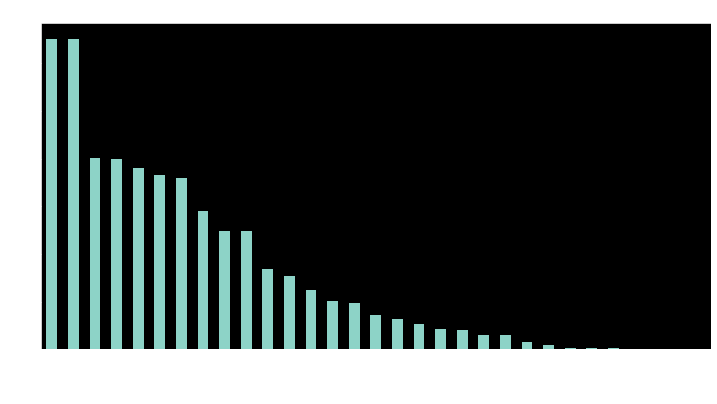

In [13]:
import matplotlib.pyplot as plt

platform_percentage = df['Platform'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
platform_percentage.plot(kind='bar')
plt.title('Platform Percentage')
plt.xlabel('Platform')
plt.ylabel('Percentage')

plt.show()

In [14]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()


platform_sales['Sales_Percentage'] = platform_sales['Global_Sales'] / platform_sales['Global_Sales'].sum() * 100


fig = px.pie(platform_sales, values='Sales_Percentage', names='Platform', title='Platform Percentage of Global Sales')
fig.show()


In [15]:
platform_counts = df['Platform'].value_counts(normalize=True) * 100

# Create a pie chart of platform percentages
fig = px.pie(platform_counts, values='Platform', names=platform_counts.index, title='Platform Distribution')
fig.show()

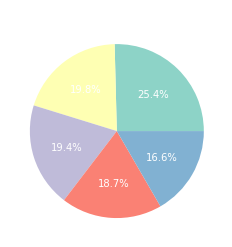

In [16]:
top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(5)


plt.pie(top_platforms.values, labels=top_platforms.index, autopct='%1.1f%%')
plt.title('Top 5 Platforms by Global Sales')
plt.show()


In [17]:
fig=px.histogram(df,x='Platform' ,template='plotly_dark')
fig.show()

In [18]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [19]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

In [20]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [21]:
games_by_publisher = df.groupby('Publisher')['Name'].count()

In [22]:
total_games = games_by_publisher.sum()

In [23]:
games_percentage = (games_by_publisher / total_games) * 100
print(games_percentage)

Publisher
10TACLE Studios                 0.018138
1C Company                      0.018138
20th Century Fox Video Games    0.030230
2D Boy                          0.006046
3DO                             0.217654
                                  ...   
id Software                     0.006046
imageepoch Inc.                 0.012092
inXile Entertainment            0.006046
mixi, Inc                       0.006046
responDESIGN                    0.012092
Name: Name, Length: 578, dtype: float64


In [24]:
# Create a pie chart of the genre column
fig = px.pie(df, names="Genre")
fig.show()